# Stage IV Member Deliverable
#### Sage Bonfield

- Utilize Linear and Non-Linear (polynomial) regression models to compare trends for a single state and its counties (top 5 with highest number of cases). Start your data from the first day of infections.
    - X-Axis - number of days since the first case, Y - Axis number of new cases and deaths. Calcluate error using RMSE.
    - Identify which counties are most at risk. Model for top 5 counties with cases within a state and describe their trends.
    - Utilize the hospital data to calculate the point of no return for a state. Use percentage occupancy / utilization to see which states are close and what their trend looks like.
    - Perform hypothesis tests on questions identified in Stage III
        - e.x. Does higher employment data (overall employment numbers) lead to higher covid case numbers or more rapid increase in covid cases.. Here you would compare the covid cases to the state or county level enrichment data to prove or disprove your null hypothesis. In this case there will be a two tail - two sample t-test to see if there is a difference and then one-tail - two sample t-test to show higher or lower.
    - Depending on your type of data you can also perform Chi-square test for categorical hypothesis testing.
___
- For each of the aforementioned analysis plot graphs,
    - trend line
    - confidence intervals (error in prediction)
    - prediction path (forecast)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
from IPython.display import Image

The counties within the state of texas that have the highest number of cases are Harris County (454009), Dallas County (330213), Tarrant County (286621), Bexar County (259636), and El Paso County (139921) as of August 16, 2021.

Set up 6 dataframes, one for each county and the state of Texas.

__Texas dataframe__

In [2]:
tx_df = pd.read_csv("../../../data/stage_2/covid_confirmed_usafacts.csv")
tx_df = tx_df[tx_df['State'] == 'TX']
tx_df = tx_df.drop(2566)
tx_df = tx_df.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'])
# first day of cases in Texas was 2020-03-05
tx_df = tx_df.drop(columns=tx_df.loc[:, :'2020-03-04'])
tx_df = tx_df.sum().to_frame()
# Make days_since column
tx_df = tx_df.reset_index().reset_index()
tx_df = tx_df.rename(columns={'level_0':'days_since'})
# Make new_cases column. Code borrowed from Stage II Team Deliverable
new_cases = pd.DataFrame(columns=["new_cases"])
for row in range(1,530):
  new_cases.loc[row, 'new_cases'] = tx_df.iloc[row,2] - tx_df.iloc[row-1,2] 

tx_df['new_cases'] = new_cases['new_cases']
tx_df = tx_df.fillna(3) # fill in the initial case count, 3
tx_df = tx_df.drop(columns=tx_df.iloc[:,1:3])
tx_df

,days_since,new_cases
0,0,3
1,1,1
2,2,4
3,3,3
4,4,5
...,...,...
525,525,15186
526,526,13711
527,527,26621
528,528,5172


__Harris County dataframe__

In [3]:
harris_df = pd.read_csv("../../../data/stage_2/covid_confirmed_usafacts.csv")
harris_df = harris_df[harris_df['countyFIPS'] == 48201]
harris_df = harris_df.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'])
# first day of cases in Harris County was 2020-03-05
harris_df = harris_df.drop(columns=harris_df.loc[:, :'2020-03-04'])
harris_df = harris_df.sum().to_frame()
# Make days_since column
harris_df = harris_df.reset_index().reset_index()
harris_df = harris_df.rename(columns={'level_0':'days_since'})
# Make new_cases column. Code borrowed from Stage II Team Deliverable
new_cases = pd.DataFrame(columns=["new_cases"])
for row in range(1,530):
  new_cases.loc[row, 'new_cases'] = harris_df.iloc[row,2] - harris_df.iloc[row-1,2] 

harris_df['new_cases'] = new_cases['new_cases']
harris_df = harris_df.fillna(2) # fill in the initial case count, 2
harris_df = harris_df.drop(columns=harris_df.iloc[:,1:3])
harris_df

,days_since,new_cases
0,0,2
1,1,1
2,2,2
3,3,0
4,4,1
...,...,...
525,525,4538
526,526,1276
527,527,3058
528,528,1573


__Dallas County dataframe__

In [4]:
dallas_df = pd.read_csv("../../../data/stage_2/covid_confirmed_usafacts.csv")
dallas_df = dallas_df[dallas_df['countyFIPS'] == 48113]
dallas_df = dallas_df.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'])
# first day of cases in Dallas County was 2020-03-10
dallas_df = dallas_df.drop(columns=dallas_df.loc[:, :'2020-03-09'])
dallas_df = dallas_df.sum().to_frame()
# Make days_since column
dallas_df = dallas_df.reset_index().reset_index()
dallas_df = dallas_df.rename(columns={'level_0':'days_since'})
# Make new_cases column. Code borrowed from Stage II Team Deliverable
new_cases = pd.DataFrame(columns=["new_cases"])
for row in range(1,525):
  new_cases.loc[row, 'new_cases'] = dallas_df.iloc[row,2] - dallas_df.iloc[row-1,2] 

dallas_df['new_cases'] = new_cases['new_cases']
dallas_df = dallas_df.fillna(2) # fill in the initial case count, 2
dallas_df = dallas_df.drop(columns=dallas_df.iloc[:,1:3])
dallas_df

,days_since,new_cases
0,0,2
1,1,0
2,2,1
3,3,4
4,4,1
...,...,...
520,520,1350
521,521,1009
522,522,915
523,523,0


__Tarrant County dataframe__

In [5]:
tarrant_df = pd.read_csv("../../../data/stage_2/covid_confirmed_usafacts.csv")
tarrant_df = tarrant_df[tarrant_df['countyFIPS'] == 48439]
tarrant_df = tarrant_df.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'])
# first day of cases in Tarrant County was 2020-03-10
tarrant_df = tarrant_df.drop(columns=tarrant_df.loc[:, :'2020-03-09'])
tarrant_df = tarrant_df.sum().to_frame()
# Make days_since column
tarrant_df = tarrant_df.reset_index().reset_index()
tarrant_df = tarrant_df.rename(columns={'level_0':'days_since'})
# Make new_cases column. Code borrowed from Stage II Team Deliverable
new_cases = pd.DataFrame(columns=["new_cases"])
for row in range(1,525):
  new_cases.loc[row, 'new_cases'] = tarrant_df.iloc[row,2] - tarrant_df.iloc[row-1,2] 

tarrant_df['new_cases'] = new_cases['new_cases']
tarrant_df = tarrant_df.fillna(1) # fill in the initial case count, 1
tarrant_df = tarrant_df.drop(columns=tarrant_df.iloc[:,1:3])
tarrant_df

,days_since,new_cases
0,0,1
1,1,0
2,2,0
3,3,0
4,4,2
...,...,...
520,520,846
521,521,815
522,522,956
523,523,1704


__Bexar County dataframe__

In [6]:
bexar_df = pd.read_csv("../../../data/stage_2/covid_confirmed_usafacts.csv")
bexar_df = bexar_df[bexar_df['countyFIPS'] == 48029]
bexar_df = bexar_df.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'])
# first day of cases in Bexar County was 2020-03-14
bexar_df = bexar_df.drop(columns=bexar_df.loc[:, :'2020-03-13'])
bexar_df = bexar_df.sum().to_frame()
# Make days_since column
bexar_df = bexar_df.reset_index().reset_index()
bexar_df = bexar_df.rename(columns={'level_0':'days_since'})
# Make new_cases column. Code borrowed from Stage II Team Deliverable
new_cases = pd.DataFrame(columns=["new_cases"])
for row in range(1,521):
  new_cases.loc[row, 'new_cases'] = bexar_df.iloc[row,2] - bexar_df.iloc[row-1,2] 

bexar_df['new_cases'] = new_cases['new_cases']
bexar_df = bexar_df.fillna(1) # fill in the initial case count, 1
bexar_df = bexar_df.drop(columns=bexar_df.iloc[:,1:3])
bexar_df

,days_since,new_cases
0,0,1
1,1,2
2,2,0
3,3,0
4,4,1
...,...,...
516,516,0
517,517,0
518,518,10098
519,519,0


__El Paso County dataframe__

In [7]:
elpaso_df = pd.read_csv("../../../data/stage_2/covid_confirmed_usafacts.csv")
elpaso_df = elpaso_df[elpaso_df['countyFIPS'] == 48141]
elpaso_df = elpaso_df.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'])
# first day of cases in Tarrant County was 2020-03-14
elpaso_df = elpaso_df.drop(columns=elpaso_df.loc[:, :'2020-03-13'])
elpaso_df = elpaso_df.sum().to_frame()
# Make days_since column
elpaso_df = elpaso_df.reset_index().reset_index()
elpaso_df = elpaso_df.rename(columns={'level_0':'days_since'})
# Make new_cases column. Code borrowed from Stage II Team Deliverable
new_cases = pd.DataFrame(columns=["new_cases"])
for row in range(1,521):
  new_cases.loc[row, 'new_cases'] = elpaso_df.iloc[row,2] - elpaso_df.iloc[row-1,2] 

elpaso_df['new_cases'] = new_cases['new_cases']
elpaso_df = elpaso_df.fillna(1) # fill in the initial case count, 1
elpaso_df = elpaso_df.drop(columns=elpaso_df.iloc[:,1:3])
elpaso_df

,days_since,new_cases
0,0,1
1,1,0
2,2,0
3,3,2
4,4,0
...,...,...
516,516,92
517,517,129
518,518,179
519,519,64


Prepare graphs with trend lines for all 6 dataframes. Each graph will show confidence interval and forecast.

__Texas predictions__

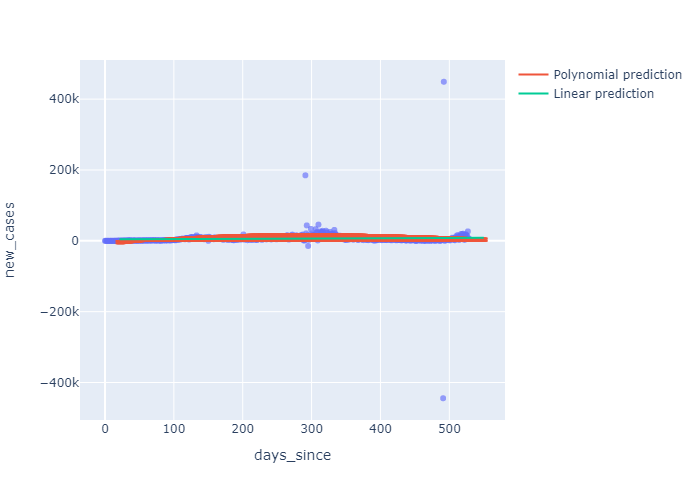

In [8]:
# Code is borrowed from Stage IV Team Deliverable. lm_poly_3 borrowed from Linear Regression lecture
# Error bars with offset found at Plotly documentation: https://plotly.com/python/error-bars/
lm_poly_3 = smf.ols(formula='new_cases ~ 1 + tx_df.days_since + I(tx_df.days_since ** 2.0) + I(tx_df.days_since ** 3.0)',
                    data=tx_df).fit()
lm = smf.ols(formula= 'new_cases ~ days_since', data =tx_df).fit()


x = pd.DataFrame({'days_since': np.linspace(tx_df.days_since.min(), tx_df.days_since.max(), 530)})
fig = px.scatter(tx_df, x='days_since', y='new_cases', opacity=0.65)
fig.add_trace(go.Scatter(x = tx_df.days_since + 21, y = lm_poly_3.predict(x), name='Polynomial prediction', error_y=dict(
    type='percent', symmetric=False, value=95, valueminus=95)))
fig.add_trace(go.Scatter(x = tx_df.days_since + 21, y = lm.predict(x), name='Linear prediction'))
# fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

__Harris County predictions__

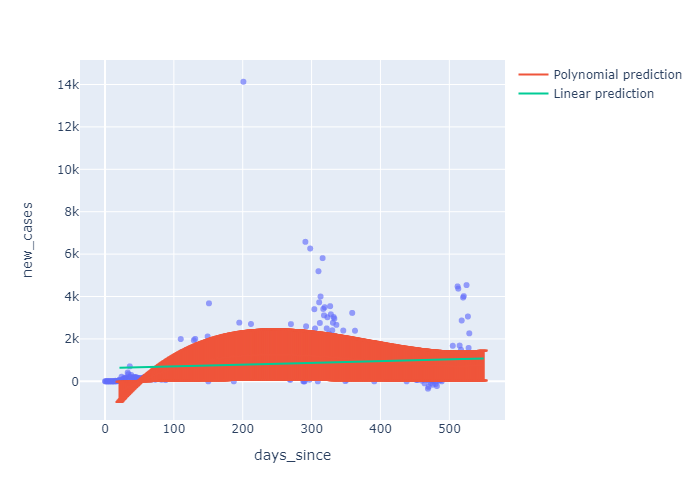

In [9]:
# Code is borrowed from Stage IV Team Deliverable. lm_poly_3 borrowed from Linear Regression lecture
# Error bars with offset found at Plotly documentation: https://plotly.com/python/error-bars/
lm_poly_3 = smf.ols(formula='new_cases ~ 1 + harris_df.days_since + I(harris_df.days_since ** 2.0) + I(harris_df.days_since ** 3.0)',
                    data=harris_df).fit()
lm = smf.ols(formula= 'new_cases ~ days_since', data =harris_df).fit()


x = pd.DataFrame({'days_since': np.linspace(harris_df.days_since.min(), harris_df.days_since.max(), 530)})
fig = px.scatter(harris_df, x='days_since', y='new_cases', opacity=0.65)
fig.add_trace(go.Scatter(x = harris_df.days_since + 21, y = lm_poly_3.predict(x), name='Polynomial prediction', error_y=dict(
    type='percent', symmetric=False, value=95, valueminus=95)))
fig.add_trace(go.Scatter(x = harris_df.days_since + 21, y = lm.predict(x), name='Linear prediction'))
# fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

__Dallas County predictions__

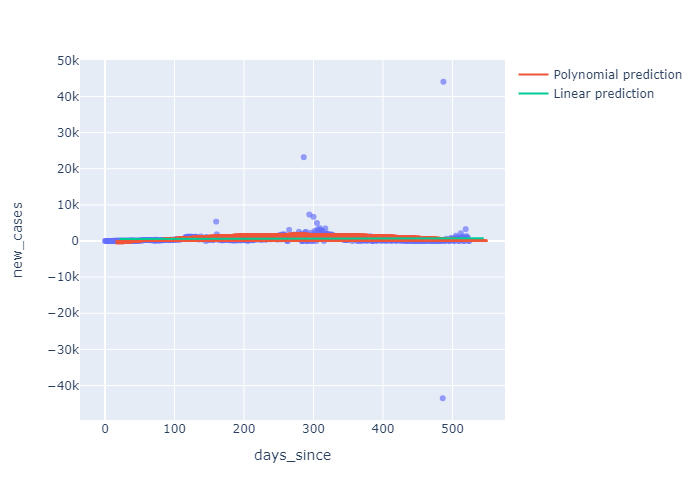

In [10]:
# Code is borrowed from Stage IV Team Deliverable. lm_poly_3 borrowed from Linear Regression lecture
# Error bars with offset found at Plotly documentation: https://plotly.com/python/error-bars/
lm_poly_3 = smf.ols(formula='new_cases ~ 1 + dallas_df.days_since + I(dallas_df.days_since ** 2.0) + I(dallas_df.days_since ** 3.0)',
                    data=dallas_df).fit()
lm = smf.ols(formula= 'new_cases ~ days_since', data =dallas_df).fit()


x = pd.DataFrame({'days_since': np.linspace(dallas_df.days_since.min(), dallas_df.days_since.max(), 525)})
fig = px.scatter(dallas_df, x='days_since', y='new_cases', opacity=0.65)
fig.add_trace(go.Scatter(x = dallas_df.days_since + 21, y = lm_poly_3.predict(x), name='Polynomial prediction', error_y=dict(
    type='percent', symmetric=False, value=95, valueminus=95)))
fig.add_trace(go.Scatter(x = dallas_df.days_since + 21, y = lm.predict(x), name='Linear prediction'))
# fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

__Tarrant County predictions__

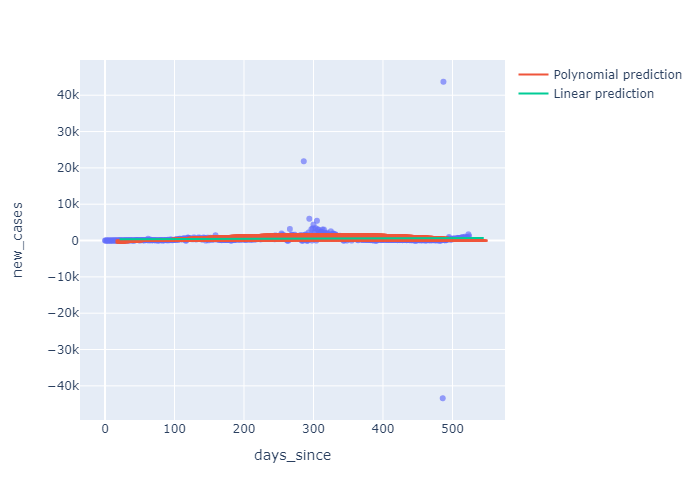

In [11]:
# Code is borrowed from Stage IV Team Deliverable. lm_poly_3 borrowed from Linear Regression lecture
# Error bars with offset found at Plotly documentation: https://plotly.com/python/error-bars/
lm_poly_3 = smf.ols(formula='new_cases ~ 1 + tarrant_df.days_since + I(tarrant_df.days_since ** 2.0) + I(tarrant_df.days_since ** 3.0)',
                    data=tarrant_df).fit()
lm = smf.ols(formula= 'new_cases ~ days_since', data =tarrant_df).fit()


x = pd.DataFrame({'days_since': np.linspace(tarrant_df.days_since.min(), tarrant_df.days_since.max(), 525)})
fig = px.scatter(tarrant_df, x='days_since', y='new_cases', opacity=0.65)
fig.add_trace(go.Scatter(x = tarrant_df.days_since + 21, y = lm_poly_3.predict(x), name='Polynomial prediction', error_y=dict(
    type='percent', symmetric=False, value=95, valueminus=95)))
fig.add_trace(go.Scatter(x = tarrant_df.days_since + 21, y = lm.predict(x), name='Linear prediction'))
# fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

__Bexar County predicitons__

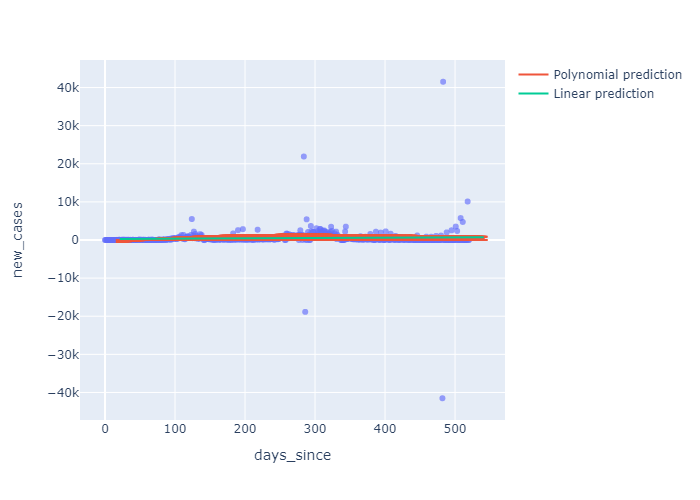

In [12]:
# Code is borrowed from Stage IV Team Deliverable. lm_poly_3 borrowed from Linear Regression lecture
# Error bars with offset found at Plotly documentation: https://plotly.com/python/error-bars/
lm_poly_3 = smf.ols(formula='new_cases ~ 1 + bexar_df.days_since + I(bexar_df.days_since ** 2.0) + I(bexar_df.days_since ** 3.0)',
                    data=bexar_df).fit()
lm = smf.ols(formula= 'new_cases ~ days_since', data = bexar_df).fit()


x = pd.DataFrame({'days_since': np.linspace(bexar_df.days_since.min(), bexar_df.days_since.max(), 521)})
fig = px.scatter(bexar_df, x='days_since', y='new_cases', opacity=0.65)
fig.add_trace(go.Scatter(x = bexar_df.days_since + 21, y = lm_poly_3.predict(x), name='Polynomial prediction', error_y=dict(
    type='percent', symmetric=False, value=95, valueminus=95)))
fig.add_trace(go.Scatter(x = bexar_df.days_since + 21, y = lm.predict(x), name='Linear prediction'))
# fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

__El Paso County predictions__

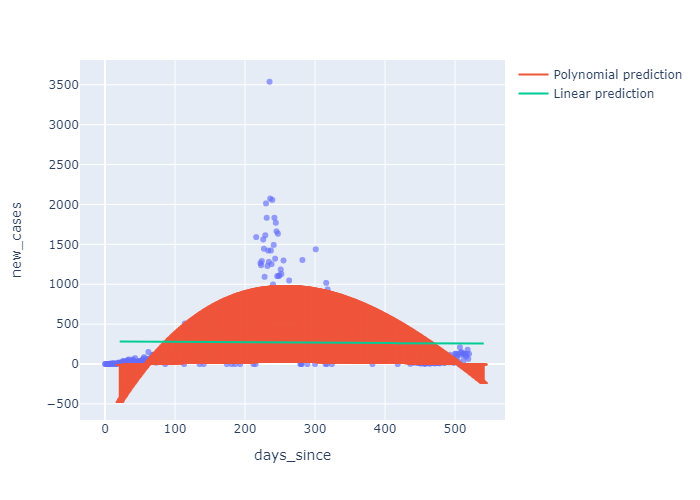

In [13]:
# Code is borrowed from Stage IV Team Deliverable. lm_poly_3 borrowed from Linear Regression lecture
# Error bars with offset found at Plotly documentation: https://plotly.com/python/error-bars/
lm_poly_3 = smf.ols(formula='new_cases ~ 1 + elpaso_df.days_since + I(elpaso_df.days_since ** 2.0) + I(elpaso_df.days_since ** 3.0)',
                    data=elpaso_df).fit()
lm = smf.ols(formula= 'new_cases ~ days_since', data =elpaso_df).fit()


x = pd.DataFrame({'days_since': np.linspace(elpaso_df.days_since.min(), elpaso_df.days_since.max(), 521)})
fig = px.scatter(elpaso_df, x='days_since', y='new_cases', opacity=0.65)
fig.add_trace(go.Scatter(x = elpaso_df.days_since + 21, y = lm_poly_3.predict(x), name='Polynomial prediction', error_y=dict(
    type='percent', symmetric=False, value=95, valueminus=95)))
fig.add_trace(go.Scatter(x = elpaso_df.days_since + 21, y = lm.predict(x), name='Linear prediction'))
# fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

__Which counties are at the highest risk?__
According to the third order trend lines on each county's graph, the only county that depicts a rise in the trend line is Harris County. We know that the trend lines might not be doing a great job of predicting 21 days ahead, and all of the data points are beginning to rise by the end of this dataset's last recorded date. However, it makes sense that Harris county would be the most at risk since it is the most populated county in Texas.

### Using hospital beds dataset to determine which states are close to the 'point of no return.'
Utilize the hospital data to calculate the point of no return for a state. Use percentage occupancy / utilization to see which states are close and what their trend looks like.
State: TX
- Plot a graph of the percentage of occupancy in TX over collection weeks
    - Group dataframe by date
    - Columns = 'collection_week' (each unique week of data collection), 'total_beds_7_day_average' (sum of all averages on given collection week.), 'percentage_occupancy' (total_beds_7_day_average / 80677)
    - Percentage occupancy = sum of total_beds_7_day_avg / total number of hospital beds in TX: 80,677
        - This number comes from https://www.dshs.texas.gov/chs/hosp/AcuteFact16.pdf
- Develop a trend line that forecasts 3 weeks ahead

In [14]:
max_beds = 80677

tx_all = pd.read_csv("./COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv")
# this file is downloaded on my machine and is too large to be held on github. Link here:
# https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u
tx_all = tx_all[tx_all['state'] == 'TX']
# clean the data
tx_all = tx_all.fillna(0)
tx_all = tx_all.replace(to_replace=-999999, value=0)
# group by collection week and add up
tx_all = tx_all.groupby(by='collection_week').sum().reset_index()
tx_all.head()

,collection_week,zip,fips_code,is_metro_micro,total_beds_7_day_avg,all_adult_hospital_beds_7_day_avg,all_adult_hospital_inpatient_beds_7_day_avg,inpatient_beds_used_7_day_avg,all_adult_hospital_inpatient_bed_occupied_7_day_avg,inpatient_beds_used_covid_7_day_avg,...,previous_day_admission_pediatric_covid_confirmed_7_day_coverage,previous_day_admission_adult_covid_suspected_7_day_coverage,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day,is_corrected
0,2020/07/31,34037441.0,21224016.0,358,57829.3,53723.2,48520.7,36970.9,34587.4,9668.7,...,2981,2984,2967,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2020/08/07,34112371.0,21272419.0,359,61140.4,56831.4,51663.3,40295.9,37789.3,8488.3,...,2994,2997,2979,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2020/08/14,33886043.0,21127686.0,356,62992.0,59081.3,53089.0,41771.8,39277.6,7185.6,...,3004,3047,3001,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2020/08/21,34187290.0,21320508.0,359,61614.1,57906.5,51936.0,39970.2,37616.5,5687.2,...,2980,3016,2976,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2020/08/28,33958045.0,21175617.0,357,62495.7,58605.4,52619.8,40695.3,38299.6,5006.5,...,3018,3053,3015,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
tx_occ = pd.DataFrame()
tx_occ['collection_week'] = tx_all['collection_week']
tx_occ['total_used_beds'] = tx_all['total_beds_7_day_avg']

# create a percent-occupancy column
tx_occ['percent_occupancy'] = 0
for row in range(0, 88):
    tx_occ.iloc[row, 2] = tx_occ.iloc[row, 1] / max_beds

tx_occ = tx_occ.reset_index()
tx_occ = tx_occ.rename(columns={'index':'week'})
tx_occ

,week,collection_week,total_used_beds,percent_occupancy
0,0,2020/07/31,57829.3,0.716800
1,1,2020/08/07,61140.4,0.757842
2,2,2020/08/14,62992.0,0.780793
3,3,2020/08/21,61614.1,0.763713
4,4,2020/08/28,62495.7,0.774641
...,...,...,...,...
83,83,2022/03/04,60291.4,0.747318
84,84,2022/03/11,59882.7,0.742252
85,85,2022/03/18,59735.3,0.740425
86,86,2022/03/25,59831.8,0.741622


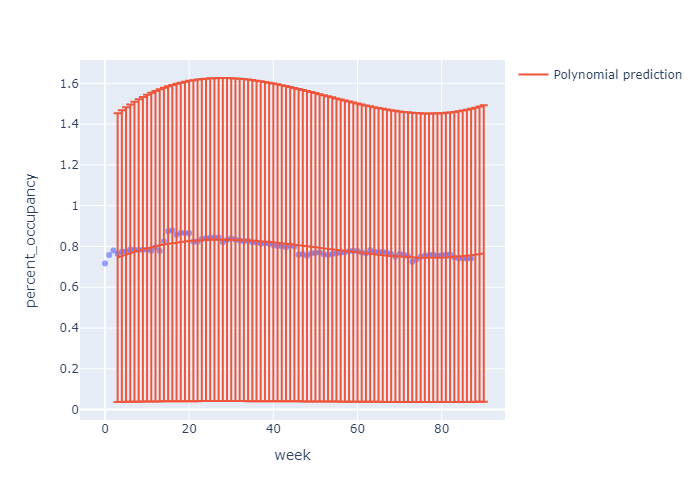

In [16]:
# Steps to plot a graph using plotly express borrowed from Stage IV Team Deliverable
# Error bars with offset found at Plotly documentation: https://plotly.com/python/error-bars/
lm_poly_3 = smf.ols(formula='percent_occupancy ~ 1 + tx_occ.week + I(tx_occ.week ** 2.0) + I(tx_occ.week ** 3.0)',
                    data=tx_occ).fit()

x = pd.DataFrame({'week': np.linspace(tx_occ.week.min(), tx_occ.week.max(), 88)})
fig = px.scatter(tx_occ, x='week', y='percent_occupancy', opacity=0.65)
fig.add_trace(go.Scatter(x = tx_occ.week + 3, y = lm_poly_3.predict(x), name='Polynomial prediction', error_y=dict(
    type='percent', symmetric=False, value=95, valueminus=95)))
# fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

#### When will hospitals in TX reach the point of no return?
By the looks of the third-order trend line, if the trend line continues to rise in this fashion then you could expect maximum hospital occupancy will be reached in ~25-75 weeks.

### Perform hypothesis tests
In Stage III I hypothesized that there will always be a higher count to the number of inpatient COVID-19 patients of older age than there would be patients of younger age. To simplify this, we should start with a null hypothesis: There is no correlation between the number of inpatient COVID-19 patients of old age and of young age. We'll test this null hypothesis starting with a Paired t-test.

DataFrame columns = week of data collection, number of inpatient COVID-19 beds of age 70-79, number of inpatient COVID-19 beds of age 20-29

In [17]:
covid_patient_impact = pd.read_csv("./COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv")
# this file is downloaded on my machine and is too large to be held on github. Link here:
# https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u

# clean the data
covid_patient_impact = covid_patient_impact.fillna(0)
covid_patient_impact = covid_patient_impact.replace(to_replace=-999999, value=0)

covid_patient_impact = covid_patient_impact.groupby("collection_week").sum().reset_index().reset_index()
covid_patient_impact.head()

,index,collection_week,zip,fips_code,is_metro_micro,total_beds_7_day_avg,all_adult_hospital_beds_7_day_avg,all_adult_hospital_inpatient_beds_7_day_avg,inpatient_beds_used_7_day_avg,all_adult_hospital_inpatient_bed_occupied_7_day_avg,...,previous_day_admission_pediatric_covid_confirmed_7_day_coverage,previous_day_admission_adult_covid_suspected_7_day_coverage,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day,is_corrected
0,0,2020/07/31,264675117.0,143373782.0,3839,787237.5,627321.3,555615.7,458251.5,394570.8,...,23771,24716,23273,0.0,0.0,0.0,0.0,0.0,0.0,3
1,1,2020/08/07,265546870.0,143712822.0,3848,810314.3,640427.0,564563.9,462566.1,402392.7,...,24782,26650,24923,0.0,0.0,0.0,0.0,0.0,0.0,13
2,2,2020/08/14,262458307.0,141718294.0,3811,809645.5,649002.5,572333.9,465293.8,405007.7,...,25151,30931,26009,0.0,0.0,0.0,0.0,0.0,0.0,18
3,3,2020/08/21,263947166.0,142490439.0,3831,806408.7,663485.9,578304.8,470571.3,407309.7,...,26370,31556,27286,0.0,0.0,0.0,0.0,0.0,0.0,19
4,4,2020/08/28,265425967.0,143518601.0,3855,820908.0,672572.1,589870.3,468013.0,412202.1,...,27687,32273,28555,0.0,0.0,0.0,0.0,0.0,0.0,34


In [18]:
hyp_test = pd.DataFrame()
hyp_test["collection_week"] = covid_patient_impact["index"]
hyp_test["twentytotwentynine_covid"] = covid_patient_impact["previous_day_admission_adult_covid_confirmed_20-29_7_day_sum"]
hyp_test["seventytoseventynine_covid"] = covid_patient_impact["previous_day_admission_adult_covid_confirmed_70-79_7_day_sum"]
hyp_test.describe()

,collection_week,twentytotwentynine_covid,seventytoseventynine_covid
count,88.000000,88.000000,88.000000
mean,43.500000,1349.943182,7708.795455
std,25.547342,1625.089249,6853.890983
min,0.000000,95.000000,564.000000
25%,21.750000,492.250000,2791.250000
50%,43.500000,807.500000,5142.500000
75%,65.250000,1644.000000,10353.750000
max,87.000000,8504.000000,25983.000000


From this DataFrame description we can see that the mean number of patients infected with COVID-19 at ages 70-79 is way higher than those of ages 20-29

In [19]:
# Paired t-test code borrowed from Lecture 6 / Hypothesis
stats.ttest_rel(a = hyp_test.twentytotwentynine_covid, b = hyp_test.seventytoseventynine_covid)

Ttest_relResult(statistic=-10.354091700208725, pvalue=7.684610654715758e-17)

(from Lecture 6 / Hypothesis)
The p-value in the test output shows that the chances of seeing this large of a difference between samples due to chance is *incredibly* low: (~0.000000000000008%).

__Reject the Null Hypothesis__

We can tell by doing a simple calculation that the one-tailed test would show that the number of patients 20-29 years of age is far less than the number of patients 70-79 years of age across the US: pvalue/2 < a (<-- confidence of 95%) and t-statistic < 0